In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import os

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error

#from keras.losses import mean_squared_error, root_mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, concatenate, Input
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop
from pickle import load

In [81]:
seq_len = 48
pred_t = 1
batch = 32

In [82]:
# Train set, Train target

train_set_ASOS = np.load('seq_data/refined_seq_data_ASOS.npy', allow_pickle=True)
train_set_add_AWS = np.load('seq_data/refined_seq_data_add_AWS.npy', allow_pickle=True)

# Train target
train_target = np.load('seq_data/refined_train_target.npy', allow_pickle=True)

In [83]:
# Test set
# ASOS
test_set1_ASOS = np.load('seq_data/seq_test20_ASOS.npy', allow_pickle=True)
test_set2_ASOS = np.load('seq_data/seq_test21_ASOS.npy', allow_pickle=True)
test_set3_ASOS = np.load('seq_data/seq_test22_ASOS.npy', allow_pickle=True)
# add_AWS
test_set1_AWS = np.load('seq_data/seq_test20_add_AWS.npy', allow_pickle=True)
test_set2_AWS = np.load('seq_data/seq_test21_add_AWS.npy', allow_pickle=True)
test_set3_AWS = np.load('seq_data/seq_test22_add_AWS.npy', allow_pickle=True)

# Test target
test_target1 = np.load('seq_data/seq_test20_target.npy', allow_pickle=True)
test_target2 = np.load('seq_data/seq_test21_target.npy', allow_pickle=True)
test_target3 = np.load('seq_data/seq_test22_target.npy', allow_pickle=True)

In [84]:
model_ASOS = keras.models.load_model('modeling_data/best_of_ASOS.h5')
model_AWS = keras.models.load_model('modeling_data/best_of_AWS.h5')

In [85]:
# Test1 predict
pred_test_target1_ASOS = model_ASOS.predict(test_set1_ASOS, batch_size = batch)
pred_test_target1_AWS = model_AWS.predict(test_set1_AWS, batch_size = batch)
obsv_test_target1 = test_target1

# Test2 predict
pred_test_target2_ASOS = model_ASOS.predict(test_set2_ASOS, batch_size = batch)
pred_test_target2_AWS = model_AWS.predict(test_set2_AWS, batch_size = batch)
obsv_test_target2 = test_target2

# Test3 predict
pred_test_target3_ASOS = model_ASOS.predict(test_set3_ASOS, batch_size = batch)
pred_test_target3_AWS = model_AWS.predict(test_set3_AWS, batch_size = batch)
obsv_test_target3 = test_target3

pred_test_target1_ASOS = pred_test_target1_ASOS.reshape(1, -1)
pred_test_target2_ASOS = pred_test_target2_ASOS.reshape(1, -1)
pred_test_target3_ASOS = pred_test_target3_ASOS.reshape(1, -1)
pred_test_target1_AWS = pred_test_target1_AWS.reshape(1, -1)
pred_test_target2_AWS = pred_test_target2_AWS.reshape(1, -1)
pred_test_target3_AWS = pred_test_target3_AWS.reshape(1, -1)

137/137 [==============================] - 0s 2ms/step


In [86]:
def new_pred(pred_ASOS, pred_AWS, th):
    new_p_list = []
    for i in range(len(pred_ASOS)):
        if(pred_ASOS[i] > th):
            new_p_list.append(pred_AWS[i])
        else:
            new_p_list.append(pred_ASOS[i])

    return np.array(new_p_list)

In [87]:
new_p1 = new_pred(pred_test_target1_ASOS[0], pred_test_target1_AWS[0], 1.0)
new_p2 = new_pred(pred_test_target2_ASOS[0], pred_test_target2_AWS[0], 1.0)
new_p3 = new_pred(pred_test_target3_ASOS[0], pred_test_target3_AWS[0], 1.0)

In [88]:
print(new_p1)
a=0
b=5
print(b)
print(new_p1[a:b])

[ 5.1167067e-03  2.7785173e-02  2.0997090e-02 ... -2.8571102e-07
 -2.8571102e-07 -2.8571102e-07]
5
[0.00511671 0.02778517 0.02099709 0.02508317 0.04444273]


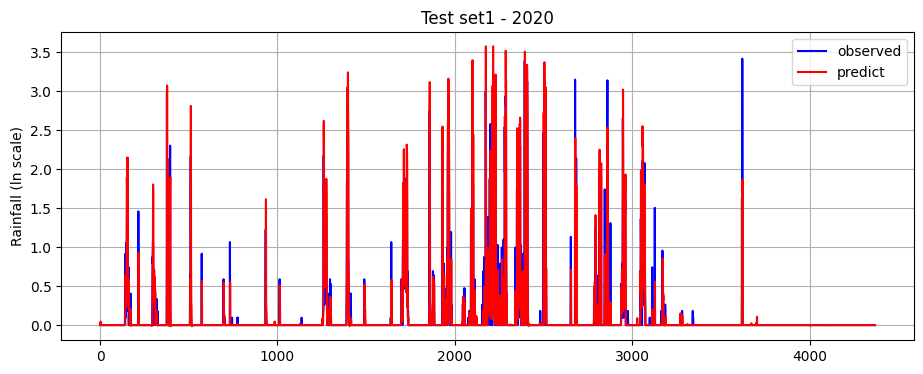

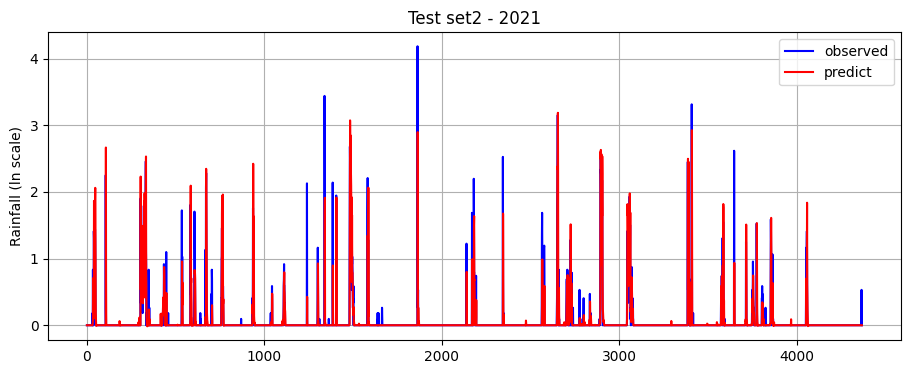

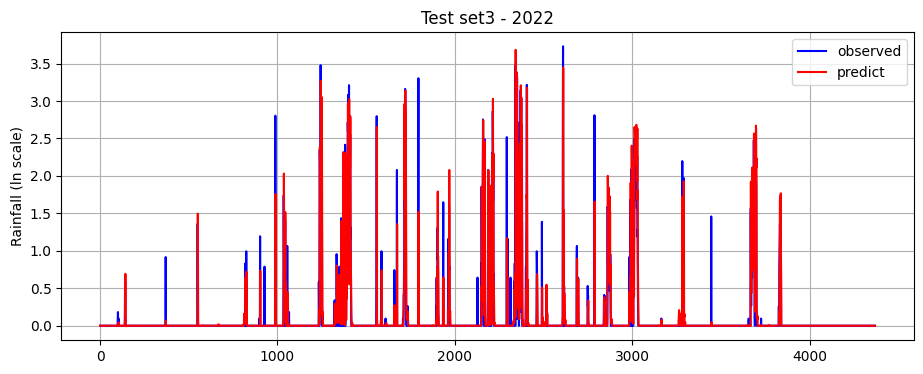

In [89]:
# graph of test1 (ln scale)

index_test = np.arange(4368)
b1 = np.arange(0, 4368)
b2 = np.arange(0, 4368)
b3 = np.arange(0, 4368)

plt.figure(figsize = (11, 4))
plt.plot(index_test[b1], obsv_test_target1[b1], 'b', label = 'observed')
plt.plot(index_test[b1], new_p1[b1], 'r', label = 'predict')

plt.legend(loc='upper right')
plt.grid()
plt.title('Test set1 - 2020')
plt.xlabel('\n')
plt.ylabel('Rainfall (ln scale)')
plt.show()

# graph of test2

plt.figure(figsize = (11, 4))
plt.plot(index_test[b2], obsv_test_target2[b2], 'b', label = 'observed')
plt.plot(index_test[b2], new_p2[b2], 'r', label = 'predict')

plt.legend(loc='upper right')
plt.grid()
plt.title('Test set2 - 2021')
plt.xlabel('\n')
plt.ylabel('Rainfall (ln scale)')
plt.show()

# graph of test3

plt.figure(figsize = (11, 4))
plt.plot(index_test[b3], obsv_test_target3[b3], 'b', label = 'observed')
plt.plot(index_test[b3], new_p3[b3], 'r', label = 'predict')

plt.legend(loc='upper right')
plt.grid()
plt.title('Test set3 - 2022')
plt.xlabel('\n')
plt.ylabel('Rainfall (ln scale)')
plt.show()

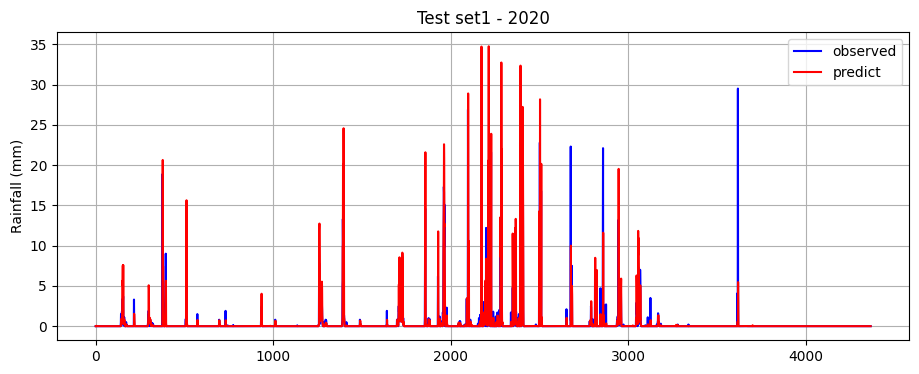

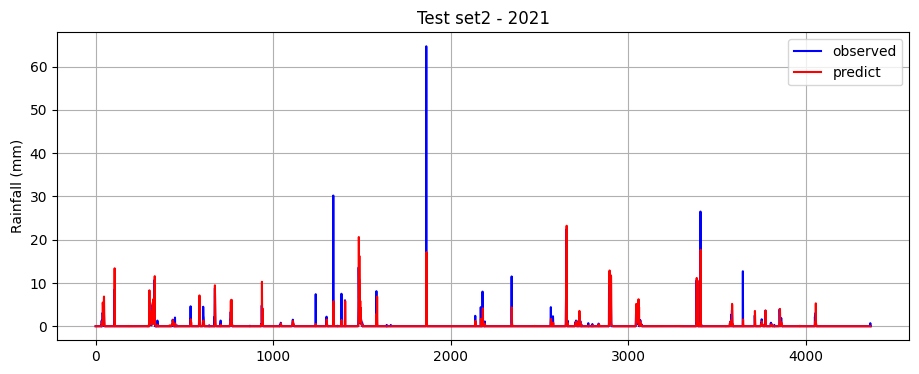

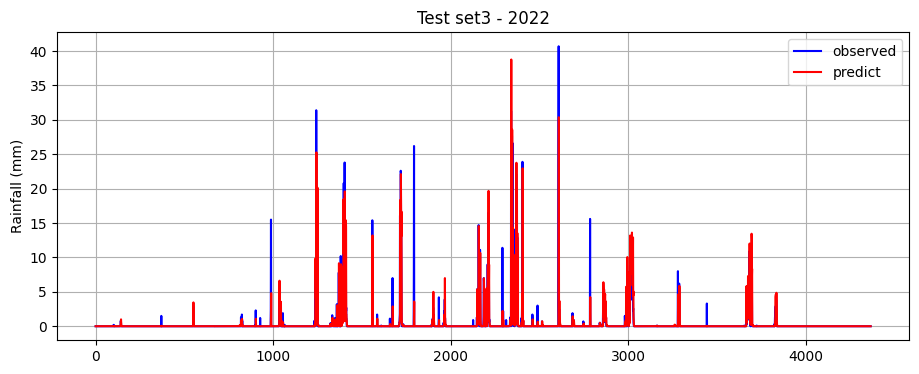

In [90]:
# graph of test1 (mm)

index_test = np.arange(4368)
b1 = range(0, 4368)
b2 = range(0, 4368)
b3 = range(0, 4368)

plt.figure(figsize = (11, 4))
plt.plot(index_test[b1], np.power(math.exp(1), obsv_test_target1[b1]) - 1, 'b', label = 'observed')
plt.plot(index_test[b1], np.power(math.exp(1), new_p1[b1]) - 1, 'r', label = 'predict')

plt.legend(loc='upper right')
plt.grid()
plt.title('Test set1 - 2020')
plt.xlabel('\n')
plt.ylabel('Rainfall (mm)')
plt.show()

# graph of test2

plt.figure(figsize = (11, 4))
plt.plot(index_test[b2], np.power(math.exp(1), obsv_test_target2[b2]) - 1, 'b', label = 'observed')
plt.plot(index_test[b2], np.power(math.exp(1), new_p2[b2]) - 1, 'r', label = 'predict')

plt.legend(loc='upper right')
plt.grid()
plt.title('Test set2 - 2021')
plt.xlabel('\n')
plt.ylabel('Rainfall (mm)')
plt.show()

# graph of test3

plt.figure(figsize = (11, 4))
plt.plot(index_test[b3], np.power(math.exp(1), obsv_test_target3[b3]) - 1, 'b', label = 'observed')
plt.plot(index_test[b3], np.power(math.exp(1), new_p3[b3]) - 1, 'r', label = 'predict')

plt.legend(loc='upper right')
plt.grid()
plt.title('Test set3 - 2022')
plt.xlabel('\n')
plt.ylabel('Rainfall (mm)')
plt.show()

In [91]:
np.save('modeling_data/pred_test1_if', new_p1)
np.save('modeling_data/pred_test2_if', new_p2)
np.save('modeling_data/pred_test3_if', new_p3)